## 1. Packaging

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np # to use numpy arrays instead of lists
import pandas as pd # DataFrame (table)

# Matplotlib and seaborn for charting
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot

In [ ]:
# Sklearn processing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [ ]:
# TensorFlow and Keras for deep learning
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, AveragePooling1D, MaxPooling1D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
!pip install keras-tuner # Install keras-tuner
import keras_tuner as kt # Now import keras_tuner

from google.colab import drive
drive.mount('gdrive')

## 2. Read file and load data

### 2.1 Read file

In [28]:
def leeDatos():

    dataSet = pd.read_csv("gdrive/MyDrive/Colab Notebooks/Amazon_Unlocked_Mobile.zip", header=0, compression='zip')

    return dataSet

### 2.2 Preprocessing

In [29]:
def encodeData(dataSet=0):
    dataSet.dropna(inplace=True)

    # Remove any 'neutral' ratings equal to 3
    dataSet = dataSet[dataSet['Rating'] != 3]

    # Encode 4s and 5s as 1 (rated positively)
    # Encode 1s and 2s as 0 (rated poorly)
    dataSet['Positively Rated'] = np.where(dataSet['Rating'] > 3, 1, 0)
    datos = ['Reviews', 'Positively Rated']
    misDatos = dataSet[datos]
    misDatos = misDatos.iloc[0:5000,:]

    return misDatos

In [30]:
datos = leeDatos()
print(datos)
print("\n")

encodeDatos = encodeData(datos)
print(encodeDatos)
print("\n")
print(encodeDatos['Positively Rated'].mean())
print("\n")

                                             Product Name Brand Name   Price  \
0       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
...                                                   ...        ...     ...   
413835  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413836  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413837  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413838  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413839  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   

        Rating                         

### 2.3 Split Data

In [31]:
ts_size = .25
trainSet, testSet = train_test_split(encodeDatos, test_size=ts_size, shuffle=False, random_state=0)
print(trainSet)
print('trainSet shape: ', trainSet.shape)
print(testSet)
print('testSet shape: ', testSet.shape)
print("\n")

                                                Reviews  Positively Rated
0     I feel so LUCKY to have found this used (phone...                 1
1     nice phone, nice up grade from my pantach revu...                 1
2                                          Very pleased                 1
3     It works good but it goes slow sometimes but i...                 1
4     Great phone to replace my lost phone. The only...                 1
...                                                 ...               ...
5680  It is very good and almost as good as new. The...                 1
5681  Bought from UnlockedCellPhoneKings refurbished...                 1
5682  I bought this iphone as "new" and when i recei...                 0
5683  I'm not too interested in having the latest te...                 1
5684  Product was brand new, and was factory unlocke...                 1

[3750 rows x 2 columns]
trainSet shape:  (3750, 2)
                                                Reviews  Pos

### 2.4 Vectorize

In [6]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

training_sentences= trainSet['Reviews']
training_labels = trainSet['Positively Rated']
testing_sentences = testSet['Reviews']
testing_labels = testSet['Positively Rated']

In [32]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [33]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## 3. CNN

In [ ]:
# CNN classifier
# Neural Network TF architecture
model = Sequential([
                    Embedding(vocab_size, embedding_dim, input_length=max_length),
                    Conv1D(filters=2, kernel_size=3, activation='relu', name="Conv1D"),
                    AveragePooling1D(pool_size=3),
                    Flatten(),
                    Dense(2, activation='relu'),
                    Dense(1, activation='sigmoid', name="Outpul_layer")
                    ])

opt = 'adam'
loss_fun = 'binary_crossentropy'
acc = ['accuracy']

model.compile(
    optimizer = opt,
    loss = loss_fun,
    metrics = acc
    )

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1D (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling1d (AveragePooling1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Outpul_layer (Dense)                 │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
num_epochs = 30
history = model.fit(training_padded,
                    training_labels,
                    validation_split=0.1,
                    epochs=num_epochs,
                    verbose=2)

Epoch 1/30
106/106 - 9s - 89ms/step - accuracy: 0.7034 - loss: 0.6837 - val_accuracy: 0.6560 - val_loss: 0.6795
Epoch 2/30
106/106 - 2s - 18ms/step - accuracy: 0.7093 - loss: 0.6663 - val_accuracy: 0.6560 - val_loss: 0.6678
Epoch 3/30
106/106 - 1s - 11ms/step - accuracy: 0.7126 - loss: 0.6480 - val_accuracy: 0.6800 - val_loss: 0.6390
Epoch 4/30
106/106 - 1s - 12ms/step - accuracy: 0.8367 - loss: 0.5927 - val_accuracy: 0.8560 - val_loss: 0.5413
Epoch 5/30
106/106 - 1s - 14ms/step - accuracy: 0.8841 - loss: 0.5070 - val_accuracy: 0.8880 - val_loss: 0.4722
Epoch 6/30
106/106 - 2s - 15ms/step - accuracy: 0.9274 - loss: 0.4367 - val_accuracy: 0.8933 - val_loss: 0.4253
Epoch 7/30
106/106 - 1s - 13ms/step - accuracy: 0.9289 - loss: 0.4018 - val_accuracy: 0.9093 - val_loss: 0.4009
Epoch 8/30
106/106 - 1s - 12ms/step - accuracy: 0.9360 - loss: 0.3686 - val_accuracy: 0.9093 - val_loss: 0.3803
Epoch 9/30
106/106 - 2s - 19ms/step - accuracy: 0.9588 - loss: 0.3265 - val_accuracy: 0.9147 - val_loss:

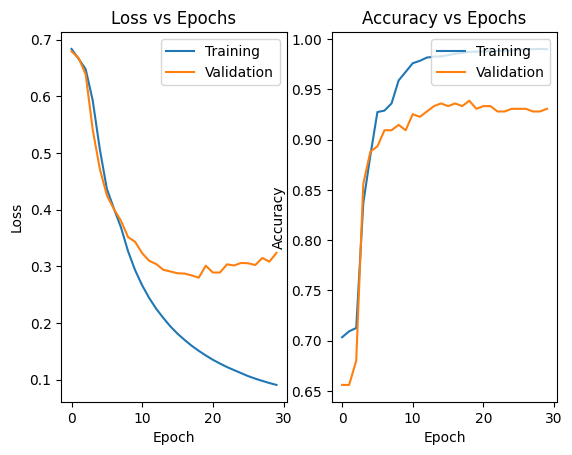

In [ ]:
fig = plt.figure()
fig.add_subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy vs Epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## 4. Metrics

In [13]:
print(model.evaluate(training_padded, training_labels, verbose=2))
print("\n")

#### predict train data ######
df_train = pd.DataFrame()
df_train['real'] = training_labels
df_train['pred'] = model.predict(training_padded).reshape(1,len(training_padded))[0]
print(round(df_train))
print(model.evaluate(testing_padded,testing_labels, verbose=2))
print("\n")

# test data
df_test = pd.DataFrame()
df_test['real'] = testing_labels
df_test['pred'] = model.predict(testing_padded).reshape(1,len(testing_padded))[0]
print(round(df_test))


118/118 - 0s - 2ms/step - accuracy: 0.9843 - loss: 0.1124
[0.11238306760787964, 0.9842666387557983]


118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
      real  pred
0        1   1.0
1        1   1.0
2        1   1.0
3        1   1.0
4        1   1.0
...    ...   ...
3745     1   1.0
3746     1   1.0
3747     0   1.0
3748     1   0.0
3749     1   0.0

[3750 rows x 2 columns]
40/40 - 0s - 4ms/step - accuracy: 0.8384 - loss: 0.6540
[0.6539991497993469, 0.8384000062942505]


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
      real  pred
0        1   0.0
1        0   0.0
2        0   0.0
3        1   1.0
4        1   0.0
...    ...   ...
1245     0   0.0
1246     1   1.0
1247     0   0.0
1248     0   0.0
1249     1   1.0

[1250 rows x 2 columns]


## 5. CNN with Keras Tuner

In [ ]:
# CNN using function for Keras Tuner
def model_builder(hp):
    vocab_size = 10000
    embedding_dim = 16
    hp_max_length = hp.Int('input_length', min_value=80, max_value=120, step=10)
    model = Sequential([
                      Embedding(vocab_size, embedding_dim, input_length=hp_max_length),
                      Conv1D(filters=2, kernel_size=3, activation='relu', name="Conv1D"),
                      AveragePooling1D(pool_size=3),
                      Flatten(),
                      Dense(2, activation='relu'),
                      Dense(1, activation='sigmoid', name="Outpul_layer")
                      ])
    opt = 'adam'
    loss_fun = 'binary_crossentropy'
    acc = ['accuracy']

    model.compile(
        optimizer = opt,
        loss = loss_fun,
        metrics = acc
        )

    return model

In [15]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     )

In [16]:
stop_early = EarlyStopping(monitor='val_loss', patience=5)

In [17]:
num_epochs = 30

tuner.search(training_padded,
             training_labels,
             validation_split=0.1,
             epochs=num_epochs,
             callbacks=[stop_early],
             verbose=2)

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""The hyperparameter search is complete.
The best 'input_length' for the embedding layer is {best_hps.get('input_length')}
""")

Trial 5 Complete [00h 00m 05s]
val_accuracy: 0.690666675567627

Best val_accuracy So Far: 0.690666675567627
Total elapsed time: 00h 00m 28s
The hyperparameter search is complete.
The best 'input_length' for the embedding layer is 100



In [18]:
model = tuner.hypermodel.build(best_hps)

history = model.fit(training_padded,
                    training_labels,
                    validation_split=0.1,
                    epochs=num_epochs,
                    verbose=2)

Epoch 1/30
106/106 - 4s - 42ms/step - accuracy: 0.6996 - loss: 0.6839 - val_accuracy: 0.6560 - val_loss: 0.6796
Epoch 2/30
106/106 - 1s - 13ms/step - accuracy: 0.7096 - loss: 0.6657 - val_accuracy: 0.6560 - val_loss: 0.6648
Epoch 3/30
106/106 - 1s - 6ms/step - accuracy: 0.7807 - loss: 0.6320 - val_accuracy: 0.8160 - val_loss: 0.5946
Epoch 4/30
106/106 - 1s - 6ms/step - accuracy: 0.8996 - loss: 0.5319 - val_accuracy: 0.8693 - val_loss: 0.4879
Epoch 5/30
106/106 - 1s - 13ms/step - accuracy: 0.9410 - loss: 0.4412 - val_accuracy: 0.9120 - val_loss: 0.4418
Epoch 6/30
106/106 - 1s - 13ms/step - accuracy: 0.9597 - loss: 0.3858 - val_accuracy: 0.9227 - val_loss: 0.3884
Epoch 7/30
106/106 - 1s - 13ms/step - accuracy: 0.9695 - loss: 0.3453 - val_accuracy: 0.9307 - val_loss: 0.3604
Epoch 8/30
106/106 - 2s - 23ms/step - accuracy: 0.9739 - loss: 0.3126 - val_accuracy: 0.9360 - val_loss: 0.3388
Epoch 9/30
106/106 - 1s - 8ms/step - accuracy: 0.9793 - loss: 0.2855 - val_accuracy: 0.9333 - val_loss: 0.

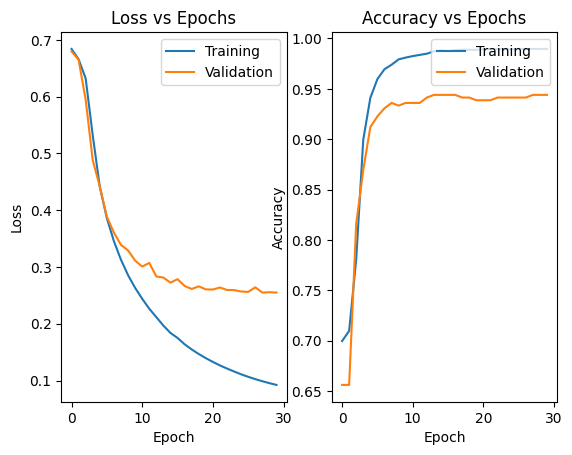

In [ ]:
fig = plt.figure()
fig.add_subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy vs Epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## 6. Metrics

In [20]:
print(model.evaluate(training_padded, training_labels, verbose=2))
print("\n")

#### predict train data ######
df_train = pd.DataFrame()
df_train['real'] = training_labels
df_train['pred'] = model.predict(training_padded).reshape(1,len(training_padded))[0]
print(round(df_train))
print(model.evaluate(testing_padded,testing_labels, verbose=2))
print("\n")

# test data
df_test = pd.DataFrame()
df_test['real'] = testing_labels
df_test['pred'] = model.predict(testing_padded).reshape(1,len(testing_padded))[0]
print(round(df_test))

118/118 - 0s - 2ms/step - accuracy: 0.9851 - loss: 0.1071
[0.10707902163267136, 0.9850666522979736]


118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
      real  pred
0        1   1.0
1        1   1.0
2        1   1.0
3        1   1.0
4        1   1.0
...    ...   ...
3745     1   1.0
3746     1   1.0
3747     0   0.0
3748     1   0.0
3749     1   0.0

[3750 rows x 2 columns]
40/40 - 0s - 5ms/step - accuracy: 0.8496 - loss: 0.4998
[0.49981507658958435, 0.8496000170707703]


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
      real  pred
0        1   1.0
1        0   0.0
2        0   1.0
3        1   1.0
4        1   0.0
...    ...   ...
1245     0   1.0
1246     1   1.0
1247     0   0.0
1248     0   0.0
1249     1   1.0

[1250 rows x 2 columns]


## 7. CNN with Keras Tuner (second model)

In [ ]:
# CNN using function for Keras Tuner (second model)
def model_builder2(hp):
    vocab_size = 10000
    hp_embedding_dim = hp.Int('embedding_dim', min_value=8, max_value=40 , step=8)
    hp_max_length = hp.Int('input_length', min_value=80, max_value=120, step=10)
    hp_filters = hp.Int('filters', min_value=2, max_value=10, step=2)
    hp_units = hp.Int('units', min_value=2, max_value=16, step=2)
    hp_activation_conv = hp.Choice('activation_conv', values=['relu', 'sigmoid', 'tanh'])
    hp_activation_dense = hp.Choice('activation_dense', values=['relu', 'sigmoid', 'tanh'])
    model = Sequential([
                      Embedding(vocab_size, hp_embedding_dim, input_length=hp_max_length),
                      Conv1D(filters=hp_filters, kernel_size=3, activation=hp_activation_conv, name="Conv1D"),
                      AveragePooling1D(pool_size=3),
                      Flatten(),
                      Dense(units=hp_units, activation=hp_activation_dense),
                      Dense(1, activation='sigmoid', name="Outpul_layer")
                      ])
    opt = 'adam'
    loss_fun = 'binary_crossentropy'
    acc = ['accuracy']

    model.compile(
        optimizer = opt,
        loss = loss_fun,
        metrics = acc
        )

    return model

In [22]:
cnn_tuner2 = kt.Hyperband(model_builder2,
                     objective='val_accuracy',
                     max_epochs=12,
                     factor=3,
                     )

Reloading Tuner from ./untitled_project/tuner0.json


In [23]:
stop_early = EarlyStopping(monitor='val_loss', patience=5)

In [24]:
num_epochs = 30

cnn_tuner2.search(training_padded,
             training_labels,
             validation_split=0.1,
             epochs=num_epochs,
             callbacks=[stop_early],
             verbose=2)

# Get the optimal hyperparameters
cnn_best_hps2=cnn_tuner2.get_best_hyperparameters(num_trials=1)[0]

print("""The hyperparameter search is complete.
The best input_length for the embedding layer is""", cnn_best_hps2.get('input_length'))

The hyperparameter search is complete.
The best input_length for the embedding layer is 100


In [25]:
model_tuner = cnn_tuner2.hypermodel.build(cnn_best_hps2)

history_tuner = model_tuner.fit(training_padded,
                    training_labels,
                    validation_split=0.1,
                    epochs=num_epochs,
                    verbose=2)

Epoch 1/30
106/106 - 3s - 24ms/step - accuracy: 0.6975 - loss: 0.6830 - val_accuracy: 0.6560 - val_loss: 0.6786
Epoch 2/30
106/106 - 1s - 12ms/step - accuracy: 0.7114 - loss: 0.6639 - val_accuracy: 0.6613 - val_loss: 0.6616
Epoch 3/30
106/106 - 1s - 8ms/step - accuracy: 0.7879 - loss: 0.6336 - val_accuracy: 0.8480 - val_loss: 0.6080
Epoch 4/30
106/106 - 1s - 11ms/step - accuracy: 0.8930 - loss: 0.5587 - val_accuracy: 0.8880 - val_loss: 0.5130
Epoch 5/30
106/106 - 1s - 9ms/step - accuracy: 0.9304 - loss: 0.4705 - val_accuracy: 0.9013 - val_loss: 0.4523
Epoch 6/30
106/106 - 1s - 6ms/step - accuracy: 0.9556 - loss: 0.4037 - val_accuracy: 0.9173 - val_loss: 0.4051
Epoch 7/30
106/106 - 1s - 10ms/step - accuracy: 0.9692 - loss: 0.3533 - val_accuracy: 0.9067 - val_loss: 0.3743
Epoch 8/30
106/106 - 1s - 6ms/step - accuracy: 0.9766 - loss: 0.3155 - val_accuracy: 0.9253 - val_loss: 0.3567
Epoch 9/30
106/106 - 1s - 6ms/step - accuracy: 0.9828 - loss: 0.2854 - val_accuracy: 0.9333 - val_loss: 0.32

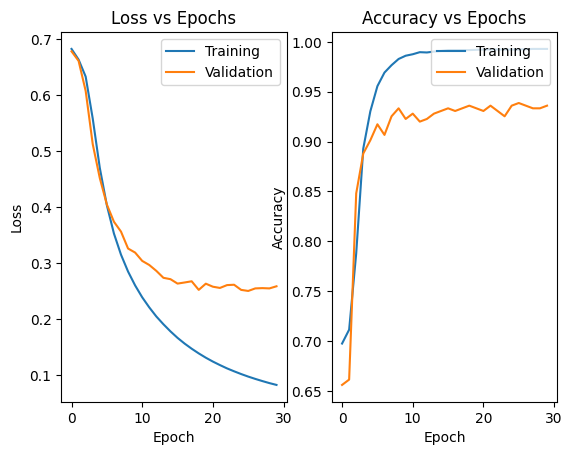

In [ ]:
fig = plt.figure()
fig.add_subplot(121)
plt.plot(history_tuner.history['loss'])
plt.plot(history_tuner.history['val_loss'])
plt.title("Loss vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)
plt.plot(history_tuner.history['accuracy'])
plt.plot(history_tuner.history['val_accuracy'])
plt.title("Accuracy vs Epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## 8. Metrics

In [27]:
print(model_tuner.evaluate(training_padded, training_labels, verbose=2))
print("\n")

#### predict train data ######
df_train = pd.DataFrame()
df_train['real'] = training_labels
df_train['pred'] = model_tuner.predict(training_padded).reshape(1,len(training_padded))[0]
print(round(df_train))
print(model_tuner.evaluate(testing_padded,testing_labels, verbose=2))
print("\n")

# test data
df_test = pd.DataFrame()
df_test['real'] = testing_labels
df_test['pred'] = model_tuner.predict(testing_padded).reshape(1,len(testing_padded))[0]
print(round(df_test))

118/118 - 1s - 6ms/step - accuracy: 0.9872 - loss: 0.0989
[0.09894653409719467, 0.9872000217437744]


118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
      real  pred
0        1   1.0
1        1   1.0
2        1   1.0
3        1   1.0
4        1   1.0
...    ...   ...
3745     1   1.0
3746     1   1.0
3747     0   1.0
3748     1   0.0
3749     1   1.0

[3750 rows x 2 columns]
40/40 - 0s - 3ms/step - accuracy: 0.7920 - loss: 0.6544
[0.6544489860534668, 0.7919999957084656]


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
      real  pred
0        1   1.0
1        0   0.0
2        0   0.0
3        1   1.0
4        1   0.0
...    ...   ...
1245     0   0.0
1246     1   1.0
1247     0   0.0
1248     0   1.0
1249     1   1.0

[1250 rows x 2 columns]
